### What is a Recommendation System?

Simply put a Recommendation System is a filtration program whose prime goal is to predict the “rating” or “preference” of a user towards a domain-specific item or item. In our case, this domain-specific item is a movie, therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

### What are the different filtration strategies?

**Content-based Filtering**


This filtration strategy is based on the data provided about the items. The algorithm recommends products that are similar to the ones that a user has liked in the past. This similarity (generally cosine similarity) is computed from the data we have about the items as well as the user’s past preferences.
For example, if a user likes movies such as ‘The Prestige’ then we can recommend him the movies of ‘Christian Bale’ or movies with the genre ‘Thriller’ or maybe even movies directed by ‘Christopher Nolan’.So what happens here the recommendation system checks the past preferences of the user and find the film “The Prestige”, then tries to find similar movies to that using the information available in the database such as the lead actors, the director, genre of the film, production house, etc and based on this information find movies similar to “The Prestige”.

Disadvantages

Different products do not get much exposure to the user.
Businesses cannot be expanded as the user does not try different types of products.
 

**Collaborative Filtering**


This filtration strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm. The main difference between content-based filtering and collaborative filtering that in the latter, the interaction of all users with the items influences the recommendation algorithm while for content-based filtering only the concerned user’s data is taken into account.
There are multiple ways to implement collaborative filtering but the main concept to be grasped is that in collaborative filtering multiple user’s data influences the outcome of the recommendation. and doesn’t depend on only one user’s data for modeling.

There are 2 types of collaborative filtering algorithms:

1. User-based Collaborative filtering

    The basic idea here is to find users that have similar past preference patterns as the user ‘A’ has had and then recommending him or her items liked by those similar users which ‘A’ has not encountered yet. This is achieved by making a matrix of items each user has rated/viewed/liked/clicked depending upon the task at hand, and then computing the similarity score between the users and finally recommending items that the concerned user isn’t aware of but users similar to him/her are and liked it.

    For example, if the user ‘A’ likes ‘Batman Begins’, ‘Justice League’ and ‘The Avengers’ while the user ‘B’ likes ‘Batman Begins’, ‘Justice League’ and ‘Thor’ then they have similar interests because we know that these movies belong to the super-hero genre. So, there is a high probability that the user ‘A’ would like ‘Thor’ and the user ‘B’ would like The Avengers’.

    Disadvantages
    1. People are fickle-minded i.e their taste change from time to time and as this 
algorithm is based on user similarity it may pick up initial similarity patterns between 2 users who after a while may have completely different preferences.

    2. There are many more users than items therefore it becomes very difficult to maintain such large matrices and therefore needs to be recomputed very regularly.

    3. This algorithm is very susceptible to shilling attacks where fake users profiles consisting of biased preference patterns are used to manipulate key decisions.
 

2. Item-based Collaborative Filtering
    The concept in this case is to find similar movies instead of similar users and then recommending similar movies to that ‘A’ has had in his/her past preferences. This is executed by finding every pair of items that were rated/viewed/liked/clicked by the same user, then measuring the similarity of those rated/viewed/liked/clicked across all user who rated/viewed/liked/clicked both, and finally recommending them based on similarity scores.

    Here, for example, we take 2 movies ‘A’ and ‘B’ and check their ratings by all users who have rated both the movies and based on the similarity of these ratings, and based on this rating similarity by users who have rated both we find similar movies. So if most common users have rated ‘A’ and ‘B’ both similarly and it is highly probable that ‘A’ and ‘B’ are similar, therefore if someone has watched and liked ‘A’ they should be recommended ‘B’ and vice versa.

    Advantages over User-based Collaborative Filtering
    1. Unlike people’s taste, movies don’t change.
    2. There are usually a lot fewer items than people, therefore easier to maintain and compute the matrices.
    3. Shilling attacks are much harder because items cannot be faked.

## Movie recommendation system using item-based collaborative filtering

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from statistics import mean
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##Reading CSVs
For this project MovieLens small dataset is used. Pandas library is used for reading the csv files.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
links = pd.read_csv("/content/drive/MyDrive/Movie Recommendation System/links.csv")
movies = pd.read_csv("/content/drive/MyDrive/Movie Recommendation System/movies.csv")
ratings = pd.read_csv("/content/drive/MyDrive/Movie Recommendation System/ratings.csv")
tags = pd.read_csv("/content/drive/MyDrive/Movie Recommendation System/tags.csv")

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(9742, 3)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Now let's make a visualization of what movie genres are there in the dataset. For that, let us create a wordcloud of the movie genres.

In [ ]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

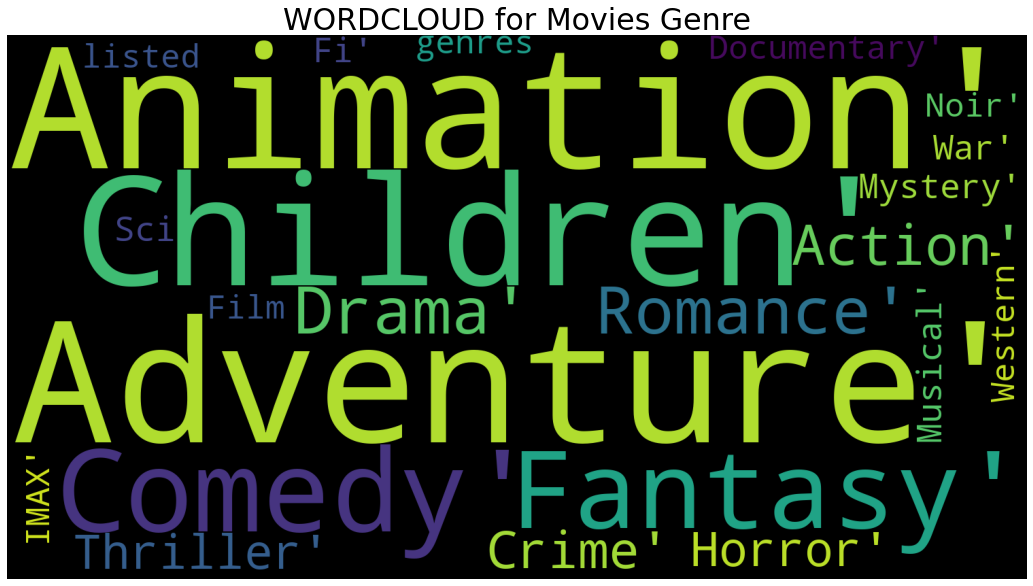

In [ ]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

let's join movies and ratings files so that we can get userId, movieId, title, genres in a single dataframe.

In [ ]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Let's drop the duplicates from the dataframe.

In [ ]:
df.drop_duplicates(['title','userId'],inplace=True)

(100836, 6)
(100832, 6)


To make things easier to understand and work with, we are going to make a new dataframe where each column would represent each unique userId and each row represents each unique movieId, title and genres.

In [ ]:
user_movie_relation = df.pivot(index=["movieId","title","genres"], columns="userId", values="rating")
user_movie_relation

,,userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,title,genres,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,Grumpier Old Men (1995),Comedy|Romance,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,Flint (2017),Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We wanted to see the average rating of each movie. But in the user_movie_relation dataset each movie is not rated by all user and we have NaN in the empty space. So we calculated the average of non-NaN values by setting the 'skipna' parameter to True.

In [ ]:
mean_rating = user_movie_relation.mean(axis= 1 , skipna= True , level=None, numeric_only=None)
mean_rating

movieId  title                                      genres                                     
1        Toy Story (1995)                           Adventure|Animation|Children|Comedy|Fantasy    3.920930
2        Jumanji (1995)                             Adventure|Children|Fantasy                     3.431818
3        Grumpier Old Men (1995)                    Comedy|Romance                                 3.259615
4        Waiting to Exhale (1995)                   Comedy|Drama|Romance                           2.357143
5        Father of the Bride Part II (1995)         Comedy                                         3.071429
                                                                                                     ...   
193581   Black Butler: Book of the Atlantic (2017)  Action|Animation|Comedy|Fantasy                4.000000
193583   No Game No Life: Zero (2017)               Animation|Comedy|Fantasy                       3.500000
193585   Flint (2017)                   

Now, Let's visualize what are the popular movies based on average rating. For the plot to be clearly visible we took first 20 movies from the dataframe.

In [ ]:
mean_rating.index.name = 'title'
mean_rating_df = mean_rating.reset_index(name='ratings')
mean_rating_df

# Plotting
fig = px.bar(mean_rating_df[:20],
             x = 'title',
             y = 'ratings',
             color='ratings',
             orientation='v',
             barmode='relative',
             template='plotly_dark',
             title="Visualization of Popular Movies")
fig.show()

Now let's sort the movies by mean rating in the ascending order and convert the series into pandas dataframe.

In [ ]:
ordering_rates=mean_rating.sort_values(ascending=False)
ordering_rates

movieId  title                                                      genres                          
96935    My Left Eye Sees Ghosts (Ngo joh aan gin diy gwai) (2002)  Comedy|Fantasy|Romance              5.0
136341   Scooby-Doo! and the Samurai Sword (2009)                   Animation|Children|Comedy           5.0
158882   All Yours (2016)                                           Comedy|Drama|Romance                5.0
6818     Come and See (Idi i smotri) (1985)                         Drama|War                           5.0
6835     Alien Contamination (1980)                                 Action|Horror|Sci-Fi                5.0
                                                                                                       ... 
136297   Mortal Kombat: The Journey Begins (1995)                   Action|Animation                    0.5
54934    Brothers Solomon, The (2007)                               Comedy                              0.5
135216   The Star Wars Holiday Spec

In [ ]:
ordering_rates.index.name = 'genres'
df2 = ordering_rates.reset_index(name='ratings')
df2

,movieId,title,genres,ratings
0,96935,My Left Eye Sees Ghosts (Ngo joh aan gin diy g...,Comedy|Fantasy|Romance,5.0
1,136341,Scooby-Doo! and the Samurai Sword (2009),Animation|Children|Comedy,5.0
2,158882,All Yours (2016),Comedy|Drama|Romance,5.0
3,6818,Come and See (Idi i smotri) (1985),Drama|War,5.0
4,6835,Alien Contamination (1980),Action|Horror|Sci-Fi,5.0
...,...,...,...,...
9716,136297,Mortal Kombat: The Journey Begins (1995),Action|Animation,0.5
9717,54934,"Brothers Solomon, The (2007)",Comedy,0.5
9718,135216,The Star Wars Holiday Special (1978),Adventure|Children|Comedy|Sci-Fi,0.5
9719,8236,While the City Sleeps (1956),Drama|Film-Noir,0.5


In [ ]:
type(df2)

pandas.core.frame.DataFrame

## Calculating the mean rating of each unique genres and Visualization of the same.

Let's see which genre got what mean rating. So we have to use group by method on the dataframe from the above operation.

In [ ]:
df3=df2.groupby(['genres'])[['ratings']].mean()
df3

,ratings
genres,
(no genres listed),3.371148
Action,2.900463
Action|Adventure,3.147827
Action|Adventure|Animation,3.507870
Action|Adventure|Animation|Children,3.369444
...,...
Sci-Fi|Thriller,3.314925
Sci-Fi|Thriller|IMAX,3.708333
Thriller,3.007170


In [ ]:
popular_movie_genres=df3.sort_values(by='ratings',ascending=False)
popular_movie_genres.reset_index(inplace=True)

Let's extract the list of unique genres in the dataset. For this purpose, let's take all the genre name in a list called data. Then for each item of data, let's spilt the item from '|' and store it into updated_data list. Now let's take an empty list called unique_genre and for every element in every item of updated_data if the element is not in unique_genre list then append it to that list. Now we got the list of all the unique genres.

In [ ]:
data = popular_movie_genres['genres'].tolist()

updated_data = []
for item in data:
    updated_data.append(item.split('|'))
updated_data

unique_genre = []

for item in updated_data:
    for genre in item:
        if genre not in unique_genre:
            unique_genre.append(genre)

for item in unique_genre:
    print(item)

Comedy
Drama
Fantasy
Mystery
Romance
Animation
Crime
Sci-Fi
IMAX
Action
Horror
Adventure
Musical
Children
Western
Thriller
Documentary
War
Film-Noir
(no genres listed)


So now we created a dataframe with only unique genres and there mean rating. Using this we can easily visualize the top genres.

In [ ]:
genre_means = []

for item in unique_genre:
    temp_ratings = []
    for i in data:
        if item in i:
            idx = popular_movie_genres.index[popular_movie_genres['genres'] == i].values[0]
            temp_ratings.append(popular_movie_genres.iloc[idx, :]['ratings'])
    genre_means.append(mean(temp_ratings))

unique_genre_ratings = pd.DataFrame(columns=["unique_genre", "mean_rating"])
unique_genre_ratings['unique_genre'] = unique_genre
unique_genre_ratings['mean_rating'] = genre_means
unique_genre_ratings

,unique_genre,mean_rating
0,Comedy,3.249147
1,Drama,3.419900
2,Fantasy,3.305526
3,Mystery,3.442604
4,Romance,3.404423
5,Animation,3.454592
6,Crime,3.342698
7,Sci-Fi,3.222160
8,IMAX,3.316328
9,Action,3.151421


In [ ]:
unique_genre_ratings=unique_genre_ratings.sort_values(by="mean_rating",ascending=True)

In [ ]:
fig=px.bar(unique_genre_ratings,
           x= "unique_genre",
           y= "mean_rating",
           color= "mean_rating",
           range_x=[-1,20],
           range_y=[2,4],
           template='plotly_dark',
           title="Visualization of Popular Movie Genres")
fig.show()

user_movie_relation was having lots of NaN values, so those NaN values must be replaced with the average of corresponding rows.

In [ ]:
updated_user_movie_rel = user_movie_relation.T.fillna(mean_rating).T.dropna()
updated_user_movie_rel

,,userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,title,genres,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.000000,3.920930,3.920930,3.920930,4.000000,3.92093,4.500000,3.920930,3.920930,3.920930,...,4.000000,3.920930,4.000000,3.000000,4.000000,2.500000,4.000000,2.500000,3.000000,5.000000
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.431818,3.431818,3.431818,3.431818,4.00000,3.431818,4.000000,3.431818,3.431818,...,3.431818,4.000000,3.431818,5.000000,3.500000,3.431818,3.431818,2.000000,3.431818,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,4.000000,3.259615,3.259615,3.259615,3.259615,5.00000,3.259615,3.259615,3.259615,3.259615,...,3.259615,3.259615,3.259615,3.259615,3.259615,3.259615,3.259615,2.000000,3.259615,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,2.357143,2.357143,2.357143,2.357143,3.00000,2.357143,2.357143,2.357143,2.357143,...,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143
5,Father of the Bride Part II (1995),Comedy,3.071429,3.071429,3.071429,3.071429,3.071429,5.00000,3.071429,3.071429,3.071429,3.071429,...,3.071429,3.071429,3.071429,3.000000,3.071429,3.071429,3.071429,3.071429,3.071429,3.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.500000,3.500000,3.500000,3.500000,3.50000,3.500000,3.500000,3.500000,3.500000,...,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
193585,Flint (2017),Drama,3.500000,3.500000,3.500000,3.500000,3.500000,3.50000,3.500000,3.500000,3.500000,3.500000,...,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000


In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. We wouldn’t want movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account.

So with all that taken into account and some trial and error experimentations,  we will reduce the noise by adding some filters for the final dataset.

1. To qualify a movie, a minimum of 10 users should have voted a movie.
2. To qualify a user, a minimum of 50 movies should have voted by the user.

In [ ]:
no_user_voted = ratings.groupby("movieId")["rating"].agg("count")
no_movies_voted = ratings.groupby("userId")["rating"].agg("count")

MovieId vs userId scatter plot which shows that how many users rated a movie.

In [ ]:
fig = px.scatter(x = no_user_voted.index, y = no_user_voted, template='plotly_dark')
fig.show()

In [ ]:
updated_user_movie_rel = updated_user_movie_rel.loc[no_user_voted[no_user_voted > 10].index,:]
updated_user_movie_rel =  updated_user_movie_rel.loc[:,no_movies_voted[no_movies_voted > 50].index]

If the dataset is big our system may run out of computational resources when that is feed to the model. To reduce the sparsity we use the csr_matrix function from the scipy library.

In [ ]:
csr_data = csr_matrix(updated_user_movie_rel.values)
updated_user_movie_rel.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

The working principle is very simple. We first check if the movie name input is in the database and if it is we use our recommendation system to find similar movies and sort them based on their similarity distance and output only the top 10 movies with their distances from the input movie.

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 11
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = updated_user_movie_rel[updated_user_movie_rel['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1], reverse=True)[:0:-1]
        recommend_frame = []

        for i, val in enumerate(rec_movie_indices):
            if i != 0:
                movie_idx = updated_user_movie_rel.iloc[val[0]]['movieId']
                idx = movies[movies['movieId'] == movie_idx].index
                recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend))
        return df
    else:
        return "No movies found. Please check your input"

Let's recommend a movie.

In [ ]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Star Trek (2009),0.004700
2,Iron Man 2 (2010),0.004834
3,"Serious Man, A (2009)",0.004908
4,Ratatouille (2007),0.004924
5,"Downfall (Untergang, Der) (2004)",0.004945
6,Zootopia (2016),0.004947
7,Captain America: Civil War (2016),0.004985
8,Doctor Strange (2016),0.005047
9,X-Men: First Class (2011),0.005089
10,Avengers: Infinity War - Part I (2018),0.005101
